In [24]:
!pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 24.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 35.6 MB/s eta 0:00:00a 0:00:01


In [1]:
import pandas as pd 

In [2]:
import torch
import torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

## Transformer function for augmented and actual dataset

In [3]:
transformAug = transforms.Compose([transforms.Resize(224),
                                transforms.CenterCrop(224),
                                transforms.ColorJitter(brightness=2),
                                transforms.RandomResizedCrop(size=(224, 224), antialias=True),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomVerticalFlip(p=0.5),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),])
transform = transforms.Compose(
    [transforms.Resize(224),
     transforms.CenterCrop(224),
     transforms.ToTensor()])

In [4]:
train_ds = dataset = datasets.ImageFolder('./clasification-roi/train/', transform=transformAug)
test_ds = dataset = datasets.ImageFolder('./clasification-roi/test/', transform=transform)
val_ds = dataset = datasets.ImageFolder('./clasification-roi/val/', transform=transform)

train_aug_ds = dataset = datasets.ImageFolder('./clasification-roi/train/', transform=transformAug)
test_aug_ds = dataset = datasets.ImageFolder('./clasification-roi/test/', transform=transform)
val_aug_ds = dataset = datasets.ImageFolder('./clasification-roi/val/', transform=transform)

In [5]:
batch_size = 32

## Loading data using DataLoader

In [6]:
trainloader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(val_ds, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

trainloaderAug = torch.utils.data.DataLoader(train_ds, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloaderAug = torch.utils.data.DataLoader(test_ds, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
valloaderAug = torch.utils.data.DataLoader(val_ds, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [7]:
classes = ('Melignant', 'Benign')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


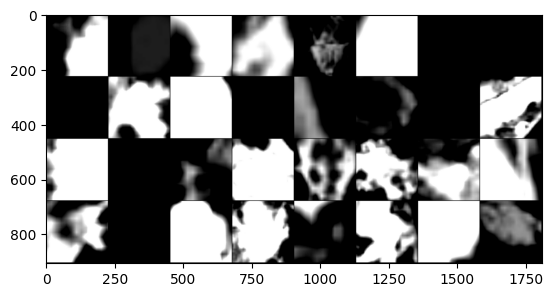

Benign Melignant Benign Benign Benign Melignant Benign Benign Benign Benign Melignant Benign Melignant Benign Benign Benign Benign Benign Benign Benign Benign Benign Melignant Melignant Benign Benign Benign Benign Benign Benign Benign Benign


In [8]:
def imshow(img):
    npimg = img.numpy()
    # print(img.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


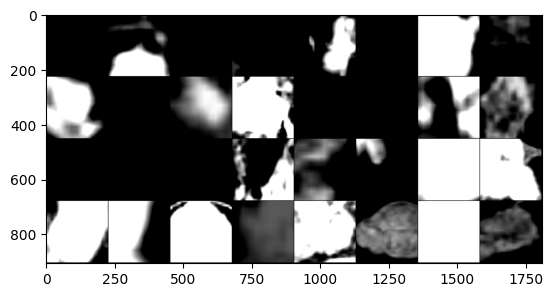

Benign Benign Melignant Melignant Benign Benign Benign Benign Benign Benign Melignant Benign Benign Benign Melignant Benign Benign Benign Benign Benign Melignant Benign Melignant Benign Benign Benign Melignant Benign Benign Melignant Benign Benign


In [9]:
def imshow(img):
    npimg = img.numpy()
    # print(img.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloaderAug)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [10]:
from collections import Counter
print(dict(Counter(sample_tup[1] for sample_tup in val_ds.imgs)))

{0: 408, 1: 1581}


# Loading VGG 16 Model

In [11]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

Using cache found in /home/harshit/.cache/torch/hub/pytorch_vision_v0.10.0
/home/harshit/miniconda3/envs/finetuning/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/harshit/miniconda3/envs/finetuning/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [12]:
import torch
from PIL import Image
import torchvision.transforms as transforms

input_image = Image.open('./clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg').convert('RGB')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

model.eval()  # Ensures the model is in evaluation mode
with torch.no_grad():
    output = model(input_batch)

# Process 'output' if needed


In [13]:
print(output)

tensor([[ 1.7678e-01,  2.8143e+00, -7.6760e-01,  2.8104e-01, -3.1522e-01,
          2.3732e+00, -3.5677e+00, -1.6586e+00, -2.1132e+00, -2.0501e+00,
          1.7990e+00, -3.0839e+00, -2.9955e+00, -1.8314e+00, -2.1882e+00,
         -1.9132e+00, -1.3861e+00, -2.7232e+00, -2.4128e+00, -2.4113e+00,
         -1.3227e+00, -1.7223e+00, -2.2544e+00, -7.7040e-01, -2.1595e+00,
         -4.6339e-01,  1.4570e+00,  4.3602e-01,  1.2763e+00,  3.9827e+00,
         -1.7732e+00,  1.3664e+00,  1.4383e+00, -5.0872e-01,  4.7622e-01,
         -8.5802e-01, -1.0467e+00, -4.2239e+00,  1.7007e+00, -3.7352e-01,
         -5.8410e-01,  4.2347e-01, -1.2252e-01,  1.9851e+00, -3.7909e-01,
         -5.6704e-01, -1.5827e+00,  2.1915e+00, -1.6177e+00, -3.6974e+00,
         -3.6414e+00,  1.7830e+00,  1.4910e+00,  5.0880e-01, -1.7717e-01,
         -9.5232e-01, -6.8190e-01, -2.3645e+00, -4.2177e+00,  4.3025e+00,
          1.5061e+00, -1.2394e+00,  1.1254e+00,  2.7262e+00,  3.1476e+00,
         -5.5993e-02,  2.5863e+00, -2.

In [14]:
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([9.1179e-05, 1.2745e-03, 3.5461e-05, 1.0120e-04, 5.5747e-05, 8.1993e-04,
        2.1563e-06, 1.4548e-05, 9.2332e-06, 9.8349e-06, 4.6178e-04, 3.4980e-06,
        3.8211e-06, 1.2239e-05, 8.5663e-06, 1.1278e-05, 1.9106e-05, 5.0169e-06,
        6.8433e-06, 6.8535e-06, 2.0356e-05, 1.3651e-05, 8.0175e-06, 3.5362e-05,
        8.8157e-06, 4.8070e-05, 3.2800e-04, 1.1816e-04, 2.7379e-04, 4.1002e-03,
        1.2973e-05, 2.9959e-04, 3.2193e-04, 4.5939e-05, 1.2301e-04, 3.2396e-05,
        2.6825e-05, 1.1187e-06, 4.1852e-04, 5.2590e-05, 4.2604e-05, 1.1669e-04,
        6.7595e-05, 5.5622e-04, 5.2298e-05, 4.3337e-05, 1.5694e-05, 6.8369e-04,
        1.5156e-05, 1.8939e-06, 2.0029e-06, 4.5445e-04, 3.3936e-04, 1.2708e-04,
        6.4000e-05, 2.9481e-05, 3.8635e-05, 7.1816e-06, 1.1257e-06, 5.6452e-03,
        3.4451e-04, 2.2123e-05, 2.3544e-04, 1.1671e-03, 1.7786e-03, 7.2244e-05,
        1.0147e-03, 6.0566e-06, 1.8992e-03, 2.0672e-05, 1.9955e-05, 3.3392e-04,
        4.5800e-05, 4.8905e-03, 3.9947e-

## plot the pixel value range from an image

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

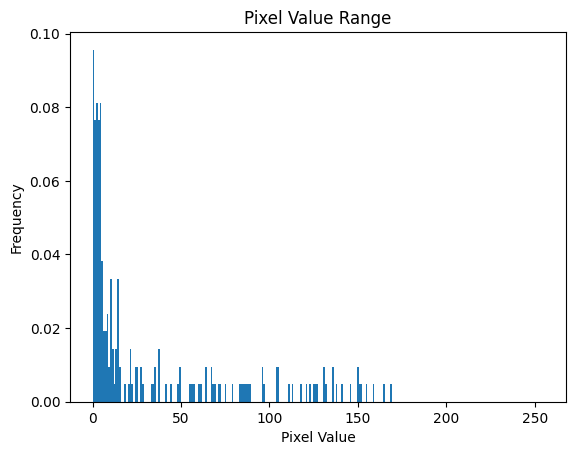

In [16]:
image_path = './clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'
image = Image.open(image_path).convert('L') 
image_array = np.array(image)

plt.hist(image_array.ravel(), bins=256, range=(0, 255), density=True)
plt.title('Pixel Value Range')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

## Ploting HOG visualizatio graph of Image

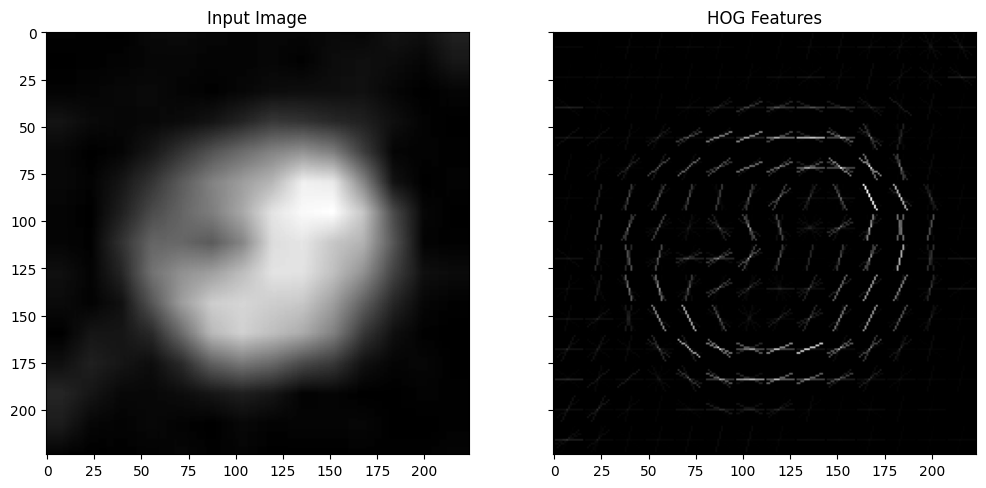

In [17]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
from PIL import Image

image_path = './clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'
input_image = Image.open(image_path).convert('L')
preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
image_tensor = preprocess(input_image)
image_numpy = image_tensor.numpy().squeeze()

hog_features, hog_image = hog(image_numpy, pixels_per_cell=(16, 16),
                              cells_per_block=(2, 2), visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax[0].imshow(image_numpy, cmap=plt.cm.gray)
ax[0].set_title('Input Image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax[1].set_title('HOG Features')

plt.show()


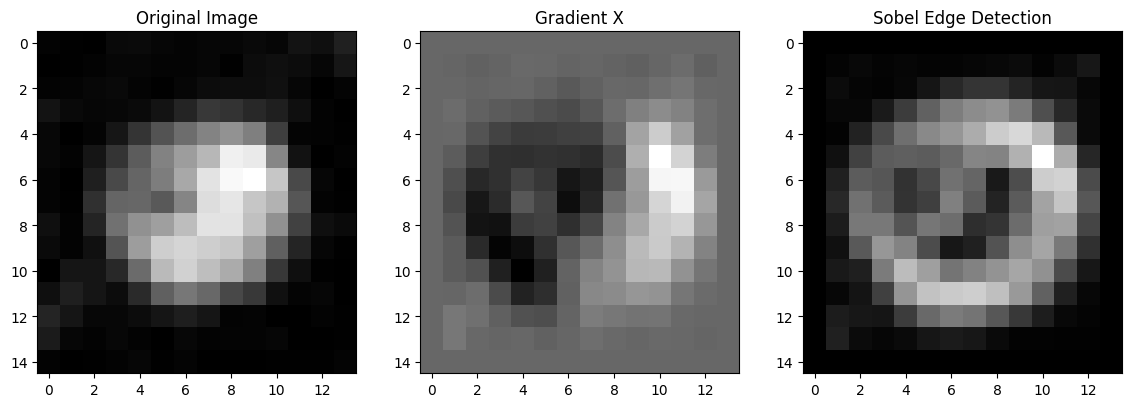

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def sobel_operator(image_path):
    image_path = './clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'
    image = Image.open(image_path).convert('L')

    img_array = np.array(image)
    
    Kx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    rows, cols = image_array.shape

    Ix = np.zeros((rows, cols))
    Iy = np.zeros((rows, cols))
    G = np.zeros((rows, cols))

    for i in range(1, rows-1):
        for j in range(1, cols-1):
            
            Ix[i, j] = np.sum(np.multiply(Kx, image_array[i-1:i+2, j-1:j+2]))
            Iy[i, j] = np.sum(np.multiply(Ky, image_array[i-1:i+2, j-1:j+2]))
            G[i, j] = np.sqrt(Ix[i, j]**2 + Iy[i, j]**2)

    G = (G / G.max()) * 255

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 3, 2)
    plt.imshow(Ix, cmap='gray')
    plt.title('Gradient X')
    plt.subplot(1, 3, 3)
    plt.imshow(G, cmap='gray')
    plt.title('Sobel Edge Detection')
    plt.show()

sobel_operator('./clasification-roi/test/Benign/BreaDM-Be-1914/VIBRANT/p-031.jpg')


In [19]:
!pip install utils

In [20]:
%matplotlib inline
# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

# Linear algebra operations
import numpy as np

# Image IO
import imageio
import utils


In [21]:
import imageio

ht = np.array([[1, 2, 1]])


hc = np.array([[1, 0, -1]])


Hx = ht.T*hc
Hy = hc.T*ht

print(Hx, end=' Hx\n\n')
print(Hy, end=' Hy\n\n')

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] Hx

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] Hy



In [22]:
def convolve(x, h):
    xh, xw = x.shape
    hh, hw = h.shape
    rh, rw = np.array(h.shape)//2
    output = np.zeros(x.shape)
    for n1 in range(rh, xh-rh):
        for n2 in range(rw, xw-rw):
            value = 0
            for k1 in range(hh):
                for k2 in range(hw):
                    value += h[k1, k2]*x[n1 + k1 - rh, n2 + k2 - rw]
            output[n1, n2] = value
    return output

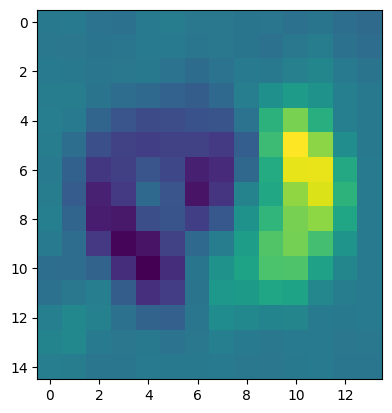

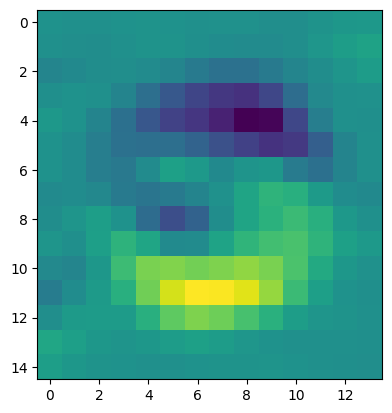

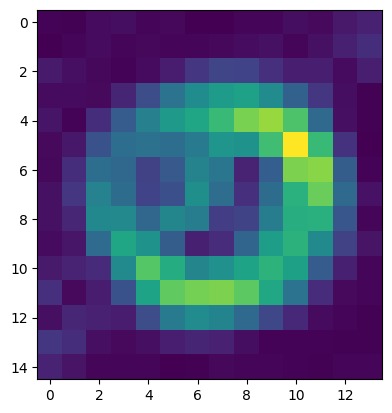

In [23]:
img_in = Image.open(image_path).convert('L')

r=1
img_pad = np.pad(
    img_in,
    ((r, r), (r, r)),
    'edge'
)

# Convolution
Gx = convolve(img_pad, Hx)[r:-r, r:-r]
plt.imshow(Gx)
plt.show()

Gy = convolve(img_pad, Hy)[r:-r, r:-r]
plt.imshow(Gy)
plt.show()

G = np.sqrt( Gy*Gy + Gx*Gx)
plt.imshow(G)
plt.show()

# Mean_Variance_Median Binary Pointer

In [24]:
def sobel_operators(image_path):
    image = Image.open(image_path).convert('L')
    image = image.resize((224,224))
    img_array = np.array(image)
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            neighborhood = neighborhood.flatten()
            surrounding_pixels = np.delete(neighborhood, 4)
            binary_pattern = 0
            for ind in range(8):
                if neighborhood[ind] >= center_pixel:
                    binary_pattern += 2**ind
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()
    
    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image_normalized, cmap='gray')
    plt.title('Variance-based LBP Image')
    plt.show()



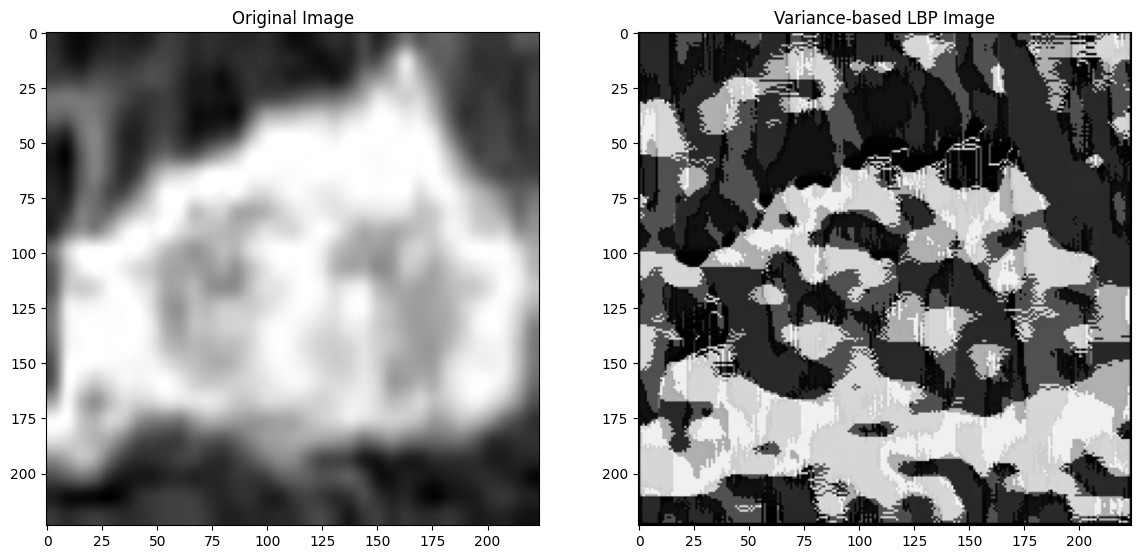

In [25]:
sobel_operators('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')

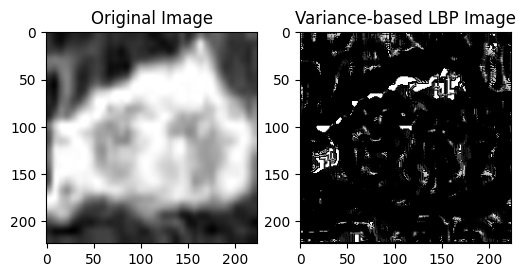

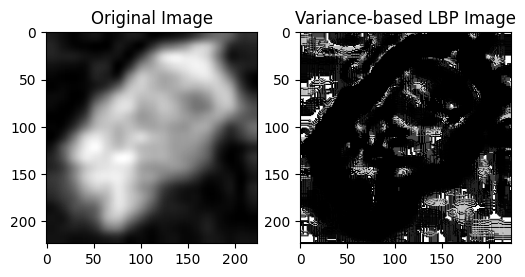

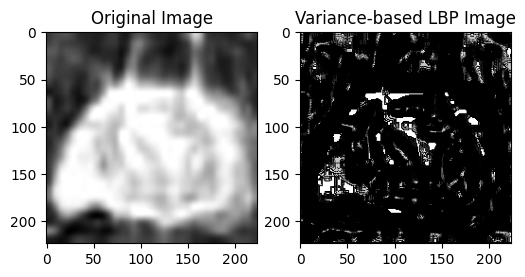

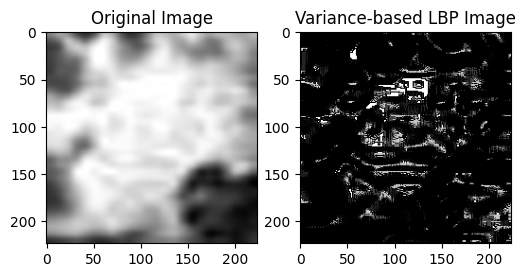

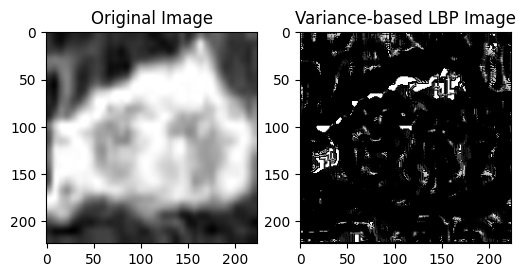

In [26]:
def variance_based_lbp(image_path):
    image = Image.open(image_path).convert('L')
    image = image.resize((224,224))
    img_array = np.array(image)
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            neighborhood = neighborhood.flatten()
            variance = np.var(neighborhood)
            surrounding_pixels = np.delete(neighborhood, 4)
            binary_pattern = 0
            for ind in range(8):
                if neighborhood[ind] >= center_pixel + variance:
                    binary_pattern += 2**ind
            lbp_image[i, j] = binary_pattern
    
    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255

    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image_normalized, cmap='gray')
    plt.title('Variance-based LBP Image')
    plt.show()

variance_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')
variance_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-1806/SUB2/p-031.jpg')
variance_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB8/p-051.jpg')
variance_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-1813/VIBRANT/p-044.jpg')
variance_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')


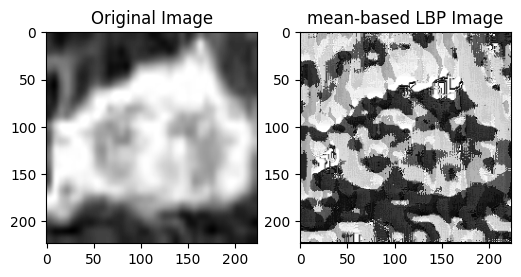

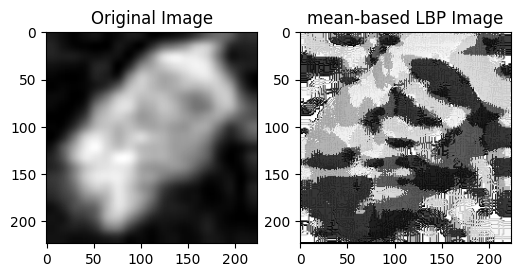

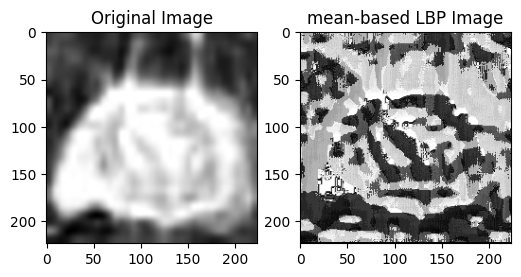

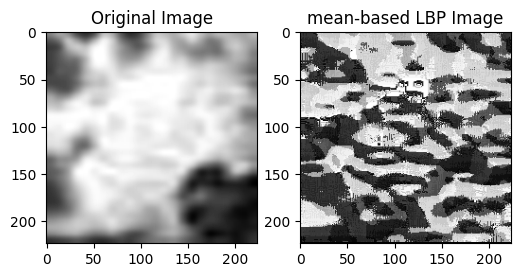

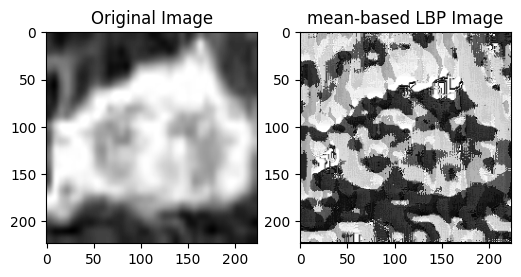

In [27]:
def mean_based_lbp(image_path):
    image = Image.open(image_path).convert('L')
    image = image.resize((224,224))
    img_array = np.array(image)
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            neighborhood = neighborhood.flatten()
            mean = np.mean(neighborhood)
            surrounding_pixels = np.delete(neighborhood, 4)
            binary_pattern = 0
            for ind in range(8):
                if neighborhood[ind] >= mean:
                    binary_pattern += 2**ind
            lbp_image[i, j] = binary_pattern
    
    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255

    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image_normalized, cmap='gray')
    plt.title('mean-based LBP Image')
    plt.show()

mean_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')
mean_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-1806/SUB2/p-031.jpg')
mean_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB8/p-051.jpg')
mean_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-1813/VIBRANT/p-044.jpg')
mean_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')

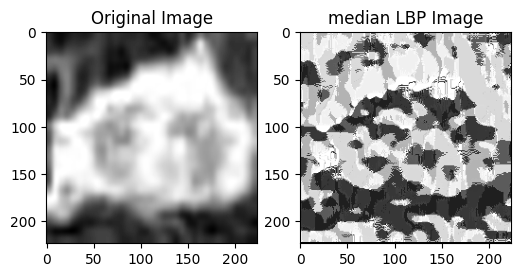

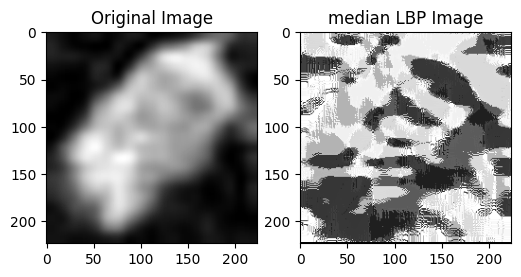

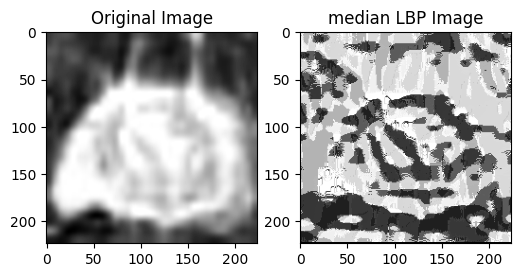

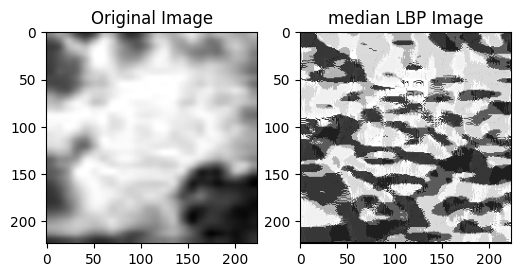

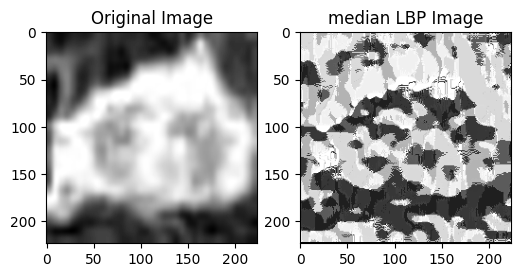

In [28]:
def median_based_lbp(image_path):
    image = Image.open(image_path).convert('L')
    image = image.resize((224,224))
    img_array = np.array(image)
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            neighborhood = neighborhood.flatten()
            median = np.median(neighborhood)
            surrounding_pixels = np.delete(neighborhood, 4)
            binary_pattern = 0
            for ind in range(8):
                if neighborhood[ind] >= median:
                    binary_pattern += 2**ind
            lbp_image[i, j] = binary_pattern
    
    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255

    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image_normalized, cmap='gray')
    plt.title('median LBP Image')
    plt.show()

median_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')
median_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-1806/SUB2/p-031.jpg')
median_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB8/p-051.jpg')
median_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-1813/VIBRANT/p-044.jpg')
median_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')


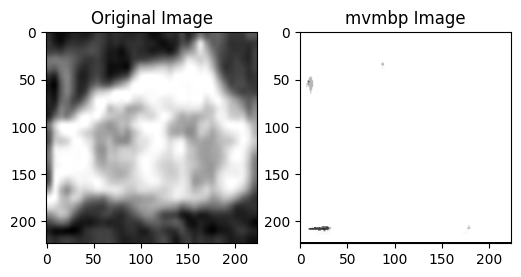

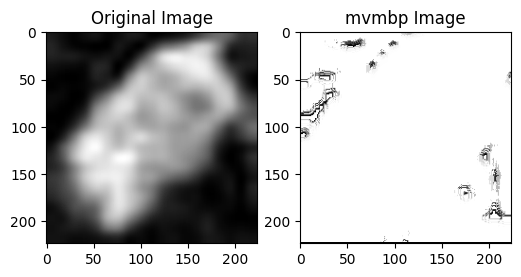

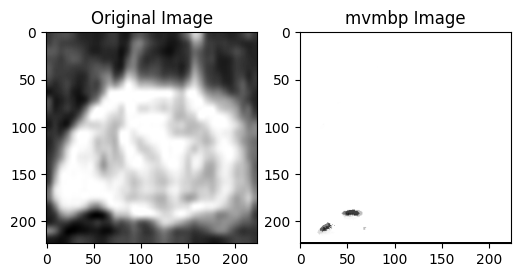

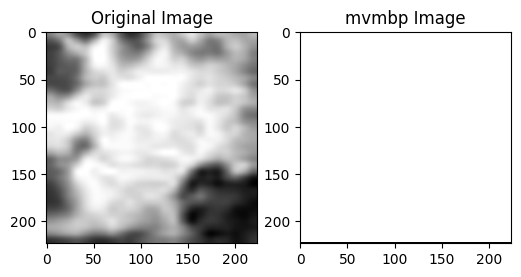

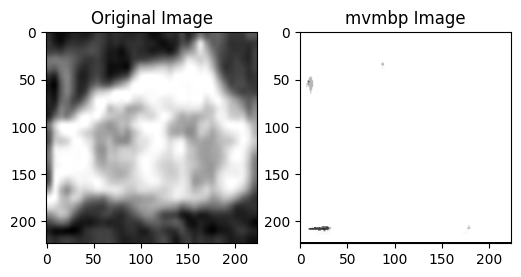

In [29]:
def mvmbp(image_path):
    image = Image.open(image_path).convert('L')
    image = image.resize((224,224))
    img_array = np.array(image)
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            neighborhood = neighborhood.flatten()
            median = np.median(neighborhood)
            mean = np.mean(neighborhood)
            variance = np.var(neighborhood)
            threshold =  (median + np.sqrt(variance) + mean)/3
            surrounding_pixels = np.delete(neighborhood, 4)
            binary_pattern = 0
            for ind in range(8):
                if neighborhood[ind] >= threshold:
                    binary_pattern += 2**ind
            lbp_image[i, j] = binary_pattern
    
    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255

    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image_normalized, cmap='gray')
    plt.title('mvmbp Image')
    plt.show()

mvmbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')
mvmbp('./clasification-roi/train/Malignant/BreaDM-Ma-1806/SUB2/p-031.jpg')
mvmbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB8/p-051.jpg')
mvmbp('./clasification-roi/train/Malignant/BreaDM-Ma-1813/VIBRANT/p-044.jpg')
mvmbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')


# GLCM ( gray scale coccurrence matrix)

In [30]:
import numpy as np
import skimage.io as io
import skimage.color as color
import skimage.feature as feature

# Load your image
image = io.imread('./clasification-roi/test/Malignant/BreaDM-Ma-1908/SUB3/p-044.jpg')

# Convert to grayscale if not already
if len(image.shape) == 3:
    image = color.rgb2gray(image)

# Convert the grayscale image to uint8
image = (image * 255).astype(np.uint8)

# Define distances and angles
distances = [1, 2, 3]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Compute the GLCM
glcm = feature.graycomatrix(image, distances=distances, angles=angles, symmetric=True, normed=True)

# Compute properties
contrast = feature.graycoprops(glcm, 'contrast')
dissimilarity = feature.graycoprops(glcm, 'dissimilarity')
homogeneity = feature.graycoprops(glcm, 'homogeneity')
energy = feature.graycoprops(glcm, 'energy')
correlation = feature.graycoprops(glcm, 'correlation')
ASM = feature.graycoprops(glcm, 'ASM')

# Print properties
print('Contrast:\n', contrast)
print('Dissimilarity:\n', dissimilarity)
print('Homogeneity:\n', homogeneity)
print('Energy:\n', energy)
print('Correlation:\n', correlation)
print('ASM:\n', ASM)


Contrast:
 [[1686.42279412 2548.7578125  1552.125      2833.28125   ]
 [5100.13333333 2548.7578125  3788.7254902  2833.28125   ]
 [8812.08823529 7457.56888889 5950.64705882 8287.72888889]]
Dissimilarity:
 [[28.03308824 33.8984375  22.55147059 35.78125   ]
 [50.88627451 33.8984375  39.09411765 35.78125   ]
 [68.55042017 62.58222222 51.57142857 66.28888889]]
Homogeneity:
 [[0.09826406 0.10716989 0.12962513 0.11304148]
 [0.08813006 0.10716989 0.12181414 0.11304148]
 [0.08217468 0.09619171 0.0818929  0.08963995]]
Energy:
 [[0.0719969  0.07724109 0.07498558 0.07411588]
 [0.06758309 0.07724109 0.07409586 0.07411588]
 [0.06420465 0.07516238 0.06253309 0.06710964]]
Correlation:
 [[0.89639481 0.84167908 0.90755972 0.82380426]
 [0.68183317 0.84167908 0.77520841 0.82380426]
 [0.45646148 0.52045684 0.64667892 0.46912593]]
ASM:
 [[0.00518355 0.00596619 0.00562284 0.00549316]
 [0.00456747 0.00596619 0.0054902  0.00549316]
 [0.00412224 0.00564938 0.00391039 0.0045037 ]]


In [31]:
import torch
import torchvision.models as models
vgg16 = models.vgg16(pretrained=True)
vgg16.eval()
print(vgg16)

/home/harshit/miniconda3/envs/finetuning/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/harshit/miniconda3/envs/finetuning/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [32]:
import torch
import torch.nn as nn
import torchvision.models as models

class Custom(nn.Module):
    def __init__(self, num_classes=2):
        super(Custom ,self).__init__()
        vgg16 = models.vgg16(pretrained=True)
        self.features = vgg16.features
        self.avgpool = vgg16.avgpool
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )
    def forward(self, x):
        # Pass the input through the features layer
        x = self.features(x)
        # Use the avgpool layer
        x = self.avgpool(x)
        # Reshape the output to a 2D tensor
        x = torch.flatten(x, 1)
        # Pass the reshaped output to the custom classifier
        x = self.classifier(x)
        return x

model = Custom(num_classes=2)
print(model)


Custom(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilatio

In [34]:
import numpy as np
import torch

class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


In [43]:
import torch
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
import os

# Define your model, assuming it's already defined as in your previous message
# model = Custom(num_classes=2)  # Make sure to import and define your model correctly

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Training Function
def train(epoch, model, num_epochs, loader, criterion, l2_decay, lr):
    learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    
    model.train()
    correct = 0

    for data, label in tqdm(loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch'):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(loader.dataset)
    print(f'Train Accuracy: {accuracy:.2f}%')


In [44]:
# Validation Function
def validation(model, val_dataloader):
    model.eval()
    correct = 0
    all_predictions = []
    all_targets = []
    possibilities = None
    
    with torch.no_grad():
        for data, target in val_dataloader:
            data, target = data.to(device), target.to(device)
            val_output = model(data)
            test_loss = F.nll_loss(F.log_softmax(val_output, dim=1), target, reduction='sum').item()
            pred = val_output.argmax(dim=1, keepdim=True)
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(val_output, dim=1).cpu().data.numpy()
            
            if possibilities is None:
                possibilities = prob
            else:
                possibilities = np.concatenate((possibilities, prob), axis=0)
            
            correct += pred.eq(target.view_as(pred)).cpu().sum().item()

    all_predictions = np.array(all_predictions).flatten()
    all_targets = np.array(all_targets).flatten()
    cm = confusion_matrix(all_targets, all_predictions)
    print(f'Confusion Matrix:\n{cm}')
    
    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[all_targets.astype(int)]
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = auc(fpr, tpr)
    
    specificity = 1 - fpr[1]
    sensitivity = tpr[1]
    print(f'Specificity: {specificity:.4f}, Sensitivity: {sensitivity:.4f}, AUC: {auc_value:.4f}')
    
    test_loss /= len(val_dataloader.dataset)
    accuracy = 100. * correct / len(val_dataloader.dataset)
    print(f'Validation Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')
    
    return accuracy, test_loss, auc_value


In [42]:
best_accuracy = 0
early_stop = EarlyStopping(patience=20, verbose=True)
project_name = "tumor_classification"
model_name = "vgg16"
num_epochs = 50
criterion = nn.CrossEntropyLoss()
l2_decay = 5e-4
lr = 0.001
for epoch in range(1, num_epochs + 1):
    train(epoch, model, num_epochs, trainloader, criterion, l2_decay, lr)
    with torch.no_grad():
        accuracy, val_loss, auc_value = validation(model, valloader)        
    state_dict = model.state_dict()
    model_save_dir = os.path.join('model', project_name, model_name)
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)
    early_stop(val_loss, model)
    if auc_value > best_accuracy:
        best_accuracy = auc_value
        torch.save(state_dict, os.path.join(model_save_dir, f'{model_name}_{epoch}.pth'))
    if early_stop.early_stop:
        print("Early stopping")
        break
# Load the best model
model.load_state_dict(torch.load(os.path.join(model_save_dir, f'{model_name}_{epoch}.pth')))
print("Model loaded with the best validation loss")

Epoch 2/20: 100%|██████████████████████████████████████████████████████████████████| 639/639 [19:38<00:00,  1.84s/batch]

Train Accuracy: 73.35%


Confusion Matrix:
[[   0  408]
 [   6 1575]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9241
Validation Loss: 0.0005, Accuracy: 79.19%
Validation loss decreased (inf --> 0.000470).  Saving model ...


Epoch 3/20: 100%|██████████████████████████████████████████████████████████████████| 639/639 [09:36<00:00,  1.11batch/s]

Train Accuracy: 75.02%


Confusion Matrix:
[[ 118  290]
 [  56 1525]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9137
Validation Loss: 0.0013, Accuracy: 82.60%
EarlyStopping counter: 1 out of 20


Epoch 4/20: 100%|██████████████████████████████████████████████████████████████████| 639/639 [09:22<00:00,  1.14batch/s]

Train Accuracy: 75.94%


Confusion Matrix:
[[ 195  213]
 [  86 1495]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9329
Validation Loss: 0.0011, Accuracy: 84.97%
EarlyStopping counter: 2 out of 20


Epoch 5/20: 100%|██████████████████████████████████████████████████████████████████| 639/639 [09:14<00:00,  1.15batch/s]

Train Accuracy: 76.33%


Confusion Matrix:
[[  87  321]
 [  65 1516]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8875
Validation Loss: 0.0010, Accuracy: 80.59%
EarlyStopping counter: 3 out of 20


Epoch 6/20: 100%|██████████████████████████████████████████████████████████████████| 639/639 [09:11<00:00,  1.16batch/s]

Train Accuracy: 76.64%


Confusion Matrix:
[[ 248  160]
 [ 293 1288]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8808
Validation Loss: 0.0015, Accuracy: 77.22%
EarlyStopping counter: 4 out of 20


Epoch 7/20: 100%|██████████████████████████████████████████████████████████████████| 639/639 [09:09<00:00,  1.16batch/s]

Train Accuracy: 77.24%


Confusion Matrix:
[[ 220  188]
 [ 203 1378]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9093
Validation Loss: 0.0008, Accuracy: 80.34%
EarlyStopping counter: 5 out of 20


Epoch 8/20: 100%|██████████████████████████████████████████████████████████████████| 639/639 [09:15<00:00,  1.15batch/s]

Train Accuracy: 77.29%


Confusion Matrix:
[[ 222  186]
 [ 215 1366]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9070
Validation Loss: 0.0014, Accuracy: 79.84%
EarlyStopping counter: 6 out of 20


Epoch 9/20: 100%|██████████████████████████████████████████████████████████████████| 639/639 [09:18<00:00,  1.14batch/s]

Train Accuracy: 77.47%


Confusion Matrix:
[[ 248  160]
 [ 217 1364]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9238
Validation Loss: 0.0010, Accuracy: 81.05%
EarlyStopping counter: 7 out of 20


Epoch 10/20: 100%|█████████████████████████████████████████████████████████████████| 639/639 [09:12<00:00,  1.16batch/s]

Train Accuracy: 77.95%


Confusion Matrix:
[[ 283  125]
 [ 463 1118]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8059
Validation Loss: 0.0021, Accuracy: 70.44%
EarlyStopping counter: 8 out of 20


Epoch 11/20: 100%|█████████████████████████████████████████████████████████████████| 639/639 [09:09<00:00,  1.16batch/s]

Train Accuracy: 78.87%


Confusion Matrix:
[[ 265  143]
 [ 355 1226]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8640
Validation Loss: 0.0010, Accuracy: 74.96%
EarlyStopping counter: 9 out of 20


Epoch 12/20: 100%|█████████████████████████████████████████████████████████████████| 639/639 [09:00<00:00,  1.18batch/s]

Train Accuracy: 79.52%


Confusion Matrix:
[[ 257  151]
 [ 257 1324]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9022
Validation Loss: 0.0017, Accuracy: 79.49%
EarlyStopping counter: 10 out of 20


Epoch 13/20: 100%|█████████████████████████████████████████████████████████████████| 639/639 [08:56<00:00,  1.19batch/s]

Train Accuracy: 79.54%


Confusion Matrix:
[[ 307  101]
 [ 510 1071]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8104
Validation Loss: 0.0006, Accuracy: 69.28%
EarlyStopping counter: 11 out of 20


Epoch 14/20: 100%|█████████████████████████████████████████████████████████████████| 639/639 [09:01<00:00,  1.18batch/s]

Train Accuracy: 79.74%


Confusion Matrix:
[[ 273  135]
 [ 403 1178]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8443
Validation Loss: 0.0007, Accuracy: 72.95%
EarlyStopping counter: 12 out of 20


Epoch 15/20: 100%|█████████████████████████████████████████████████████████████████| 639/639 [09:36<00:00,  1.11batch/s]

Train Accuracy: 79.90%


Confusion Matrix:
[[ 285  123]
 [ 290 1291]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8963
Validation Loss: 0.0007, Accuracy: 79.24%
EarlyStopping counter: 13 out of 20


Epoch 16/20: 100%|█████████████████████████████████████████████████████████████████| 639/639 [09:08<00:00,  1.17batch/s]

Train Accuracy: 79.53%


Confusion Matrix:
[[ 281  127]
 [ 457 1124]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8163
Validation Loss: 0.0017, Accuracy: 70.64%
EarlyStopping counter: 14 out of 20


Epoch 17/20: 100%|█████████████████████████████████████████████████████████████████| 639/639 [09:04<00:00,  1.17batch/s]

Train Accuracy: 79.91%


Confusion Matrix:
[[ 263  145]
 [ 298 1283]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8861
Validation Loss: 0.0007, Accuracy: 77.73%
EarlyStopping counter: 15 out of 20


Epoch 18/20: 100%|█████████████████████████████████████████████████████████████████| 639/639 [09:02<00:00,  1.18batch/s]

Train Accuracy: 79.99%


Confusion Matrix:
[[ 280  128]
 [ 327 1254]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8771
Validation Loss: 0.0007, Accuracy: 77.12%
EarlyStopping counter: 16 out of 20


Epoch 19/20: 100%|█████████████████████████████████████████████████████████████████| 639/639 [09:00<00:00,  1.18batch/s]

Train Accuracy: 80.31%


Confusion Matrix:
[[300 108]
 [604 977]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7457
Validation Loss: 0.0016, Accuracy: 64.20%
EarlyStopping counter: 17 out of 20


Epoch 20/20: 100%|█████████████████████████████████████████████████████████████████| 639/639 [09:07<00:00,  1.17batch/s]

Train Accuracy: 80.01%


Confusion Matrix:
[[ 255  153]
 [ 299 1282]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8862
Validation Loss: 0.0011, Accuracy: 77.28%
EarlyStopping counter: 18 out of 20


Epoch 21/20:  92%|███████████████████████████████████████████████████████████▋     | 587/639 [08:26<00:44,  1.16batch/s]


KeyboardInterrupt: 